In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("/Users/calvinatkins/Downloads/Data Sets/heart_disease_health_indicators_Brfss2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
# Contingency table without merged HD
data_crosstab_HD = pd.crosstab(df['GenHlth'], df['HeartDiseaseorAttack'], margins = False)
print(data_crosstab_HD)

HeartDiseaseorAttack    0.0   1.0
GenHlth                          
1.0                   44283  1016
2.0                   84956  4128
3.0                   67732  7914
4.0                   24842  6728
5.0                    7974  4107


In [4]:
# Change this to reflect the new variable HD+Stroke that is created
data_crosstab_HD_Stroke = pd.crosstab([df.GenHlth], 
                             [df.HeartDiseaseorAttack, df.Stroke], margins = False)
print(data_crosstab_HD_Stroke)

HeartDiseaseorAttack    0.0         1.0      
Stroke                  0.0   1.0   0.0   1.0
GenHlth                                      
1.0                   43929   354   925    91
2.0                   83666  1290  3754   374
3.0                   65579  2153  6894  1020
4.0                   23160  1682  5431  1297
5.0                    7098   876  2952  1155


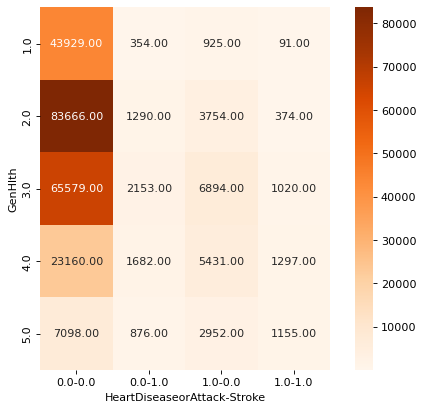

In [6]:
# Contingency Table Heatmap Structure
fig = plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(data_crosstab_HD_Stroke, cmap = "Oranges", annot=True, fmt='.2f')#, vmin=0.0, vmax=100.0)


In [7]:
# Chi Square test for independence
# Only Genhlth vs HD
stats.chi2_contingency(data_crosstab_HD)

# Test stat 19008
# P value 0.0
# DF 4
# Array of expected values

(19008.164421708283,
 0.0,
 4,
 array([[41032.48704273,  4266.51295727],
        [80693.57106591,  8390.42893409],
        [68521.23699937,  7124.76300063],
        [28596.56098234,  2973.43901766],
        [10943.14390965,  1137.85609035]]))

In [8]:
# Chi Square test for independence
# Only Genhlth vs HD+Stroke
stats.chi2_contingency(data_crosstab_HD_Stroke)

# Test stat 24723
# P value 0.0
# DF 12
# Array of expected values

(24723.218872157973,
 0.0,
 12,
 array([[39897.69066541,  1134.79637733,  3563.49276254,   703.02019473],
        [78461.90589719,  2231.66516872,  7007.88514664,  1382.54378745],
        [66626.21046988,  1895.02652949,  5950.77095553,  1173.9920451 ],
        [27805.69315673,   790.86782561,  2483.48675497,   489.95226269],
        [10640.49981079,   302.64409886,   950.36438032,   187.49171003]]))